In [130]:
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv("economy.csv")
df.index = df.index + 1
df

,Year,VVP,Earning,VVPC
1,1997,79,106,72
2,1998,76,91,71
3,1999,75,90,71
4,2000,72,85,69
5,2001,70,82,67
6,2002,68,81,66
7,2003,66,81,63
8,2003,63,70,56
9,2004,56,51,58
10,2005,56,64,60


In [135]:
#df.drop(df.columns[[0]], axis=1, inplace=True)
df.describe()

,VVP,Earning,VVPC
count,21.000000,21.000000,21.000000
mean,55.142857,61.476190,55.285714
std,14.728495,21.830298,11.252301
min,36.000000,34.000000,40.000000
25%,41.000000,43.000000,45.000000
50%,56.000000,52.000000,56.000000
75%,68.000000,81.000000,66.000000
max,79.000000,106.000000,72.000000


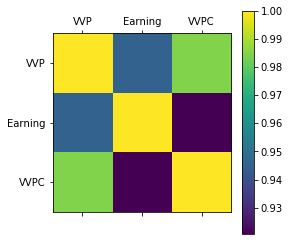

In [136]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [142]:
corr = df.corr()
corr.style.background_gradient()

,VVP,Earning,VVPC
VVP,1,0.945576,0.985082
Earning,0.945576,1,0.920478
VVPC,0.985082,0.920478,1


In [146]:
first = 1 + 0.945576 + 0.985082
second = 0.945576 + 1 + 0.920478
third = 0.985082 + 0.920478 + 1
print('Показатель 1 = ', first, 'Показатель 2 = ', second, 'Показатель 3 = ', third)

Показатель 1 =  2.930658 Показатель 2 =  2.866054 Показатель 3 =  2.90556


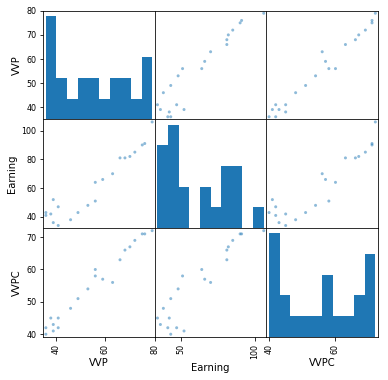

In [147]:
pd.plotting.scatter_matrix(df, figsize=(6, 6))
plt.show()

In [149]:
X = df[['VVPC','Earning']]
Y = df['VVP']

X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)
print(predictions)

                            OLS Regression Results                            
Dep. Variable:                    VVP   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     446.9
Date:                Mon, 14 Jan 2019   Prob (F-statistic):           4.55e-16
Time:                        13:54:45   Log-Likelihood:                -44.558
No. Observations:                  21   AIC:                             95.12
Df Residuals:                      18   BIC:                             98.25
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.7525      3.241     -3.009      0.0